<a href="https://colab.research.google.com/github/HWP-Wilson/Previsao_de_casos_covid_em_Fortaleza_com_Arima_statsmodel/blob/main/Helano_Wilson_Projeto4_bootcampAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###<font color='blue'>Casos confirmados de Covid-19 em Fortaleza: Os próximos 30 dias (24/01/2021 até 23/02/2021) possuem tendência de aumento no número de casos? É possível prever esse aumento?

Helano Wilson - helanowilson@ufc.br






O projeto consiste em prever a quantidade de casos confirmados de Covid-19, na cidade de Fortaleza-CE, nos próximos 30 dias. O projeto não almejou analisar e apresentar os dados, do dataset, de forma exploratória, e sim, determinar um método consistente (e satisfatório) para essa previsão. Vamos lá!!!

Etapas:

1- Prever os 30 próximos dias atráves do número de casos acumulados.

2- Prever os 30 próximos dias atráves do número de casos novos por dia. 


Os dados utilizados nesse projeto foram extraídos no site https://covid.saude.gov.br/

In [ ]:
### Importando as bibliotecas a serem utilizadas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import statsmodels.api as sm



In [ ]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###Chamando o arquivo;
df = pd.read_csv("/content/drive/MyDrive/Helano_Wilson_Projeto4_bootcampAlura/HIST_PAINEL_COVIDBR_23jan2021.csv",  sep=';')
df.head(4)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN


In [ ]:
# Utilizando somente os dados de Fortaleza-CE
df_fortaleza = df.loc[df.municipio == "Fortaleza"]
df_fortaleza.head(3)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
298719,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2020-03-27,13,2669342.0,0,0,0,0,NaN,NaN,1.0
298720,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2020-03-28,13,2669342.0,304,304,4,4,NaN,NaN,1.0
298721,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2020-03-29,14,2669342.0,338,34,5,1,NaN,NaN,1.0


In [ ]:
###Conferindo o primeiro dado e o último dado de Covid. Está de acordo com o propósito do projeto. 
df_fortaleza.iloc[[0, -1]]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
298719,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2020-03-27,13,2669342.0,0,0,0,0,NaN,NaN,1.0
299021,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2021-01-23,3,2669342.0,92947,290,4286,4,NaN,NaN,1.0


In [ ]:
###Ainda como conferência, observa-se que existem os 303 dias nesse intervalo.  
df_fortaleza.shape

(303, 17)

In [ ]:
### Selecionando somente colunas utilizáveis para esse projeto. Transformando coluna 'data' em datetime
df_fortaleza = df_fortaleza.set_index('data')
df_fortaleza.index = pd.to_datetime(df_fortaleza.index, format='%Y-%m-%d')
df_fortaleza = df_fortaleza[['municipio','casosAcumulado']].groupby('data').sum()
df_fortaleza.head(10)

,casosAcumulado
data,
2020-03-27,0
2020-03-28,304
2020-03-29,338
2020-03-30,353
2020-03-31,371
2020-04-01,413
2020-04-02,507
2020-04-03,600
2020-04-04,680


In [ ]:
###Conferindo que o novo dataFrame possui a coluna data já no formato "datetime";
df_fortaleza.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 303 entries, 2020-03-27 to 2021-01-23
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   casosAcumulado  303 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [ ]:
###Importando biblioteca para decomposição da Série temporal;
from statsmodels.tsa.seasonal import seasonal_decompose

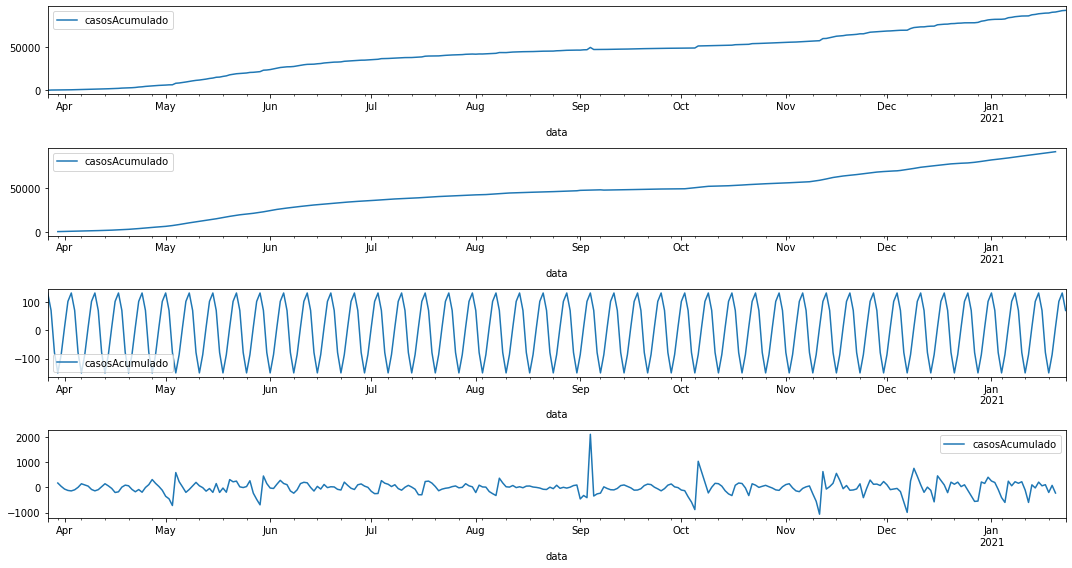

In [ ]:
###Visualização das decomposições. É possivel perceber claramente a tendência de aumento.
decomposicao = seasonal_decompose(df_fortaleza)
# plotar a decomposicao
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout()

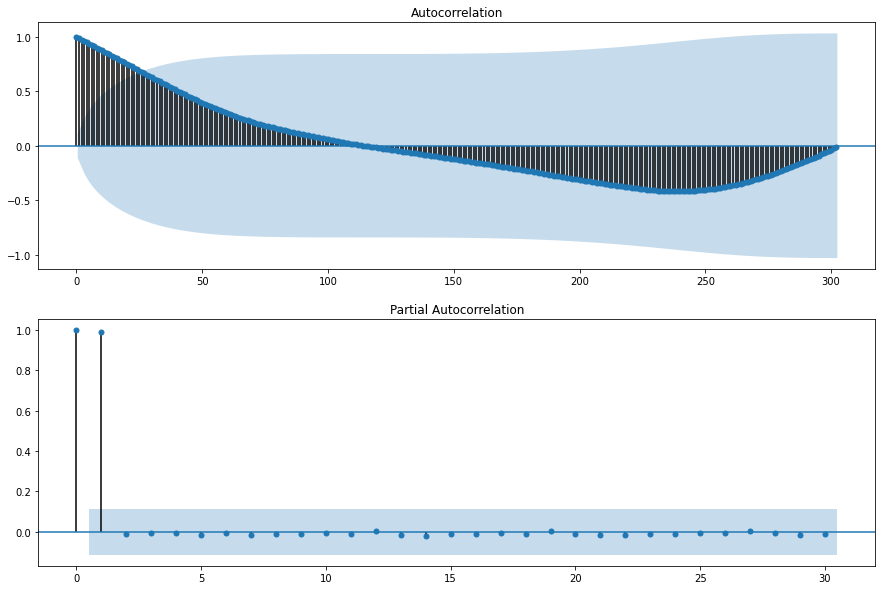

In [ ]:
###Análise de autocorrelação e correlação parcial; 303 dias de Covid até hoje (24/01/2021)
import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_fortaleza.values.squeeze(), lags=302, ax=ax1)
sm.graphics.tsa.plot_pacf(df_fortaleza.values.squeeze(), lags=30, ax=ax2)
plt.show()

In [ ]:
###Instalação de pmdarima para previsão de novos casos;
!pip install pmdarima

In [ ]:
### Importação da função autoArima; o m=7 indica que os intervalos estão em dias. 
from pmdarima.arima import auto_arima
bruteforce_modelo = auto_arima(df_fortaleza, start_p=0, start_d=0 ,start_q=0,max_p=8, max_d=8,max_q=8, m=7, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=4546.954, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=4405.434, Time=0.27 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=4407.268, Time=1.75 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=4468.444, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=4407.230, Time=0.92 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=1.72 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=4424.386, Time=0.21 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=2.70 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=4543.064, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=4406.644, Time=0.97 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=1.32 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=4464.130, Time=0.27 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.78 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=2.99 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AI

In [ ]:
### Impressão dos melhores resultados dos parâmetros p, d, q;
print(f"Resultado AIC: {bruteforce_modelo.aic()}")
print(f"Resultado melhores parametros (p,d,q): {bruteforce_modelo.order}")

Resultado AIC: 4397.767647854862
Resultado melhores parametros (p,d,q): (4, 1, 0)


In [ ]:
###Modelo de previsão para os próximos 30 dias
futuro_forecast = bruteforce_modelo.predict(n_periods=30)

In [ ]:
###Inserindo lista de 30 dias no dataFrame. 
i
mport datetime 
dataatual = datetime.datetime.today()
dataatual = datetime.datetime.today() - datetime.timedelta(days=1)
lista_datas = [dataatual + datetime.timedelta(days=x) for x in range(30)]
lista_datas = [pd.datetime.strftime(i,'%Y-%m-%d') for i in lista_datas]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [ ]:
###Método de previsão Forecast
futuro_forecast = bruteforce_modelo.predict(n_periods=30)
futuro_forecast = pd.DataFrame(futuro_forecast,index = lista_datas,columns=["casosAcumulado"])
futuro_forecast.index.name = 'data'
futuro_forecast.index = pd.to_datetime(futuro_forecast.index)
futuro_forecast.casosAcumulado = round(futuro_forecast.casosAcumulado,0)
futuro_forecast

,casosAcumulado
data,
2021-01-23,93235.0
2021-01-24,93535.0
2021-01-25,94084.0
2021-01-26,94685.0
2021-01-27,95227.0
2021-01-28,95650.0
2021-01-29,95900.0
2021-01-30,96139.0
2021-01-31,96357.0


In [ ]:
### Gráfico com dados reais de Covid-19 em Fortaleza de março 2020 ate 23/01/2021, 
###além da previsão para os próximos 30 dias
import plotly.graph_objects as go   
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_fortaleza.index, y=df_fortaleza.casosAcumulado,mode='lines+markers',
                    name='Atual'))

fig.add_trace(go.Scatter(x=futuro_forecast.index, y=futuro_forecast.casosAcumulado,mode='lines+markers', name='Previsto',
line=dict(dash='dashdot')))

fig.update_layout(title="Previsão para os próximos 30 dias de casos acumulados de COVID-19 em Fortaleza-CE", width=800, height=600)
fig.show()

Para validação do método, iremos prever os 30 últimos dias, voltando no tempo 30 dias. 

In [ ]:
### Validação do método, voltando 30 dias para confirmação em cima dos dados reais. 
dataatual = datetime.datetime.today()
dataatual = datetime.datetime.today() - datetime.timedelta(days=30)
lista_datas = [dataatual + datetime.timedelta(days=x) for x in range(30)]
lista_datas = [pd.datetime.strftime(i,'%Y-%m-%d') for i in lista_datas]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [ ]:
lista_datas

['2020-12-25',
 '2020-12-26',
 '2020-12-27',
 '2020-12-28',
 '2020-12-29',
 '2020-12-30',
 '2020-12-31',
 '2021-01-01',
 '2021-01-02',
 '2021-01-03',
 '2021-01-04',
 '2021-01-05',
 '2021-01-06',
 '2021-01-07',
 '2021-01-08',
 '2021-01-09',
 '2021-01-10',
 '2021-01-11',
 '2021-01-12',
 '2021-01-13',
 '2021-01-14',
 '2021-01-15',
 '2021-01-16',
 '2021-01-17',
 '2021-01-18',
 '2021-01-19',
 '2021-01-20',
 '2021-01-21',
 '2021-01-22',
 '2021-01-23']

In [ ]:
###O dataFrame da validação não consta os últimos 30 dias do dataframe original. 
df_validacao = df_fortaleza.iloc[0:-29]

In [ ]:
### Primeiro e último dado do df_validação
df_validacao.iloc[[0,-1]]

,casosAcumulado
data,
2020-03-27,0
2020-12-25,78485


In [ ]:
from pmdarima.arima import auto_arima
valid_model = auto_arima(df_validacao, start_p=0, start_d=0 ,start_q=0,max_p=8, max_d=8,max_q=8, m=7, start_P=0,seasonal= True, d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=4107.076, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=3979.421, Time=0.28 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=4028.124, Time=0.16 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=2.53 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=3999.385, Time=0.13 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=1.37 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=3.05 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=4103.348, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=1.42 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=4025.300, Time=0.24 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=1.83 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=3997.822, Tim

In [ ]:
print(f"Resultado AIC: {valid_model.aic()}")
print(f"Resultado melhores parametros (p,d,q): {valid_model.order}")

Resultado AIC: 3979.4207147775783
Resultado melhores parametros (p,d,q): (0, 1, 0)


In [ ]:
valid_forecast = valid_model.predict(n_periods=30)
valid_forecast = pd.DataFrame(valid_forecast,index = lista_datas,columns=["casosAcumulado"])
valid_forecast.index.name = 'data'
valid_forecast.index = pd.to_datetime(valid_forecast.index)
valid_forecast.casosAcumulado = round(valid_forecast.casosAcumulado,0)
valid_forecast.head(2)

,casosAcumulado
data,
2020-12-25,78695.0
2020-12-26,78970.0


In [ ]:
import plotly.graph_objects as go   
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_fortaleza.index, y=df_fortaleza.casosAcumulado,mode='lines+markers',
                    name='Atual'))

fig.add_trace(go.Scatter(x=valid_forecast.index, y=valid_forecast.casosAcumulado,mode= 'lines+markers' , name='Validação 30 dias',
line=dict(dash='dashdot')))

fig.add_trace(go.Scatter(x=futuro_forecast.index, y=futuro_forecast.casosAcumulado,mode='lines+markers', name='Previsto 30 dias',
line=dict(dash='dashdot')))

fig.update_layout(title="Comparando eficiência do modelo com dados já existentes.", width=1000, height=600)
fig.show()

A partir de agora iremos tentar prever os próximos 30 dias, em função dos novos casos diários e não mais em relação ao número de casos acumulados. 

In [ ]:
###Criando um novo dataframe
df_fortaleza_novosCasos= df.loc[df.municipio== 'Fortaleza']
df_fortaleza_novosCasos

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
298719,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2020-03-27,13,2669342.0,0,0,0,0,NaN,NaN,1.0
298720,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2020-03-28,13,2669342.0,304,304,4,4,NaN,NaN,1.0
298721,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2020-03-29,14,2669342.0,338,34,5,1,NaN,NaN,1.0
298722,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2020-03-30,14,2669342.0,353,15,5,0,NaN,NaN,1.0
298723,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2020-03-31,14,2669342.0,371,18,6,1,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299017,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2021-01-19,3,2669342.0,90762,865,4259,5,NaN,NaN,1.0
299018,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2021-01-20,3,2669342.0,91059,297,4258,-1,NaN,NaN,1.0
299019,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2021-01-21,3,2669342.0,91793,734,4262,4,NaN,NaN,1.0
299020,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2021-01-22,3,2669342.0,92657,864,4282,20,NaN,NaN,1.0


In [ ]:
df_fortaleza_novosCasos = df_fortaleza_novosCasos.set_index('data')
df_fortaleza_novosCasos.index = pd.to_datetime(df_fortaleza_novosCasos.index, format='%Y-%m-%d')
df_fortaleza_novosCasos = df_fortaleza_novosCasos[['municipio','casosNovos']].groupby('data').sum()
df_fortaleza_novosCasos.head(2)

,casosNovos
data,
2020-03-27,0
2020-03-28,304


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

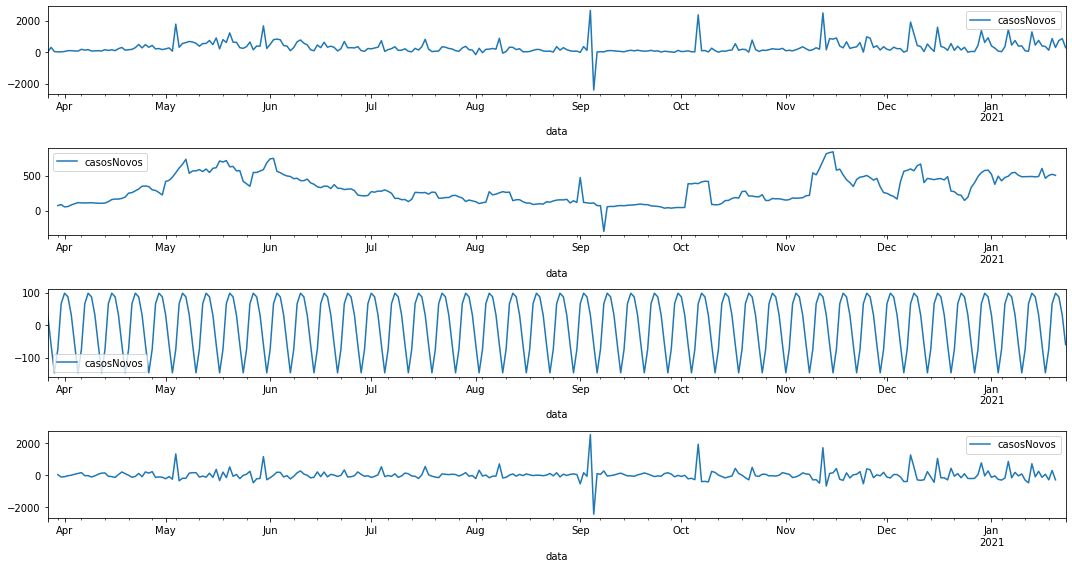

In [ ]:
seasonplot = seasonal_decompose(df_fortaleza_novosCasos)
# plotar a decomposicao
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1)
seasonplot.trend.plot(ax=ax2)
seasonplot.seasonal.plot(ax=ax3)
seasonplot.resid.plot(ax=ax4)
plt.tight_layout()

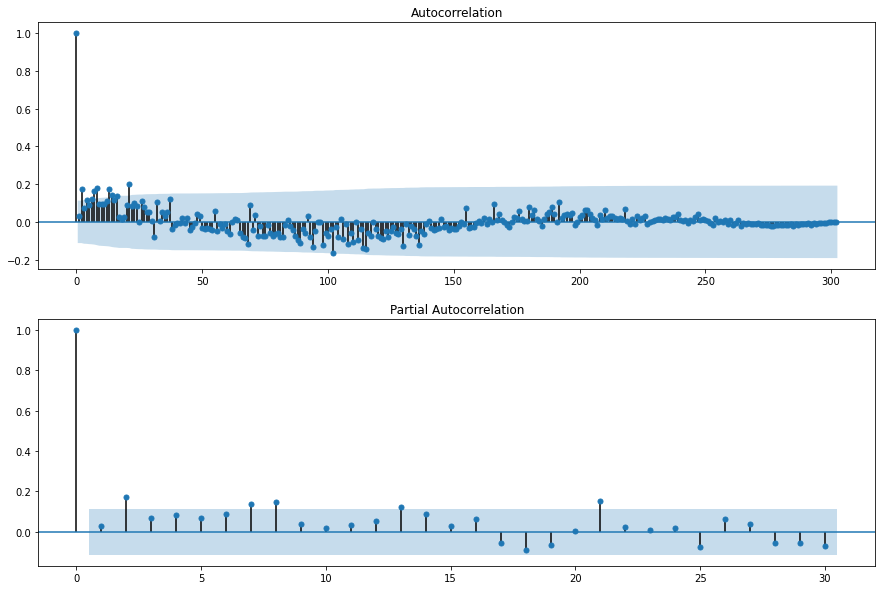

In [ ]:
import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_fortaleza_novosCasos.values.squeeze(), lags=302, ax=ax1)
sm.graphics.tsa.plot_pacf(df_fortaleza_novosCasos.values.squeeze(), lags=30, ax=ax2)
plt.show()

In [ ]:
from pmdarima.arima import auto_arima
bruteforce_modelo = auto_arima(df_fortaleza_novosCasos,start_p=0, start_d=0 ,start_q=0,max_p=8, max_d=8,max_q=8, m=7, start_P=0,seasonal= True, d=1, D=1,trace=True, error_action='ignore',suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=4793.000, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=4714.410, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=2.39 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=4662.170, Time=0.19 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=3.86 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=1.71 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=inf, Time=0.40 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=1.04 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=1.94 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=inf, Time=1.12 sec
 ARIMA(0,

In [ ]:
print(f"Resultado AIC: {bruteforce_modelo.aic()}")
print(f"Resultado melhores parametros (p,d,q): {bruteforce_modelo.order}")

Resultado AIC: 4471.955107227941
Resultado melhores parametros (p,d,q): (3, 1, 0)


In [ ]:
futuro_forecast = bruteforce_modelo.predict(n_periods=30)

In [ ]:
import datetime 
dataatual = datetime.datetime.today()
dataatual = datetime.datetime.today() - datetime.timedelta(days=1)
lista_datas = [dataatual + datetime.timedelta(days=x) for x in range(30)]
lista_datas = [pd.datetime.strftime(i,'%Y-%m-%d') for i in lista_datas]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [ ]:
futuro_forecast = bruteforce_modelo.predict(n_periods=30)
futuro_forecast = pd.DataFrame(futuro_forecast,index = lista_datas,columns=["casosNovos"])
futuro_forecast.index.name = 'data'
futuro_forecast.index = pd.to_datetime(futuro_forecast.index)
futuro_forecast.casosNovos = round(futuro_forecast.casosNovos,0)
futuro_forecast

,casosNovos
data,
2021-01-23,125.0
2021-01-24,150.0
2021-01-25,443.0
2021-01-26,1047.0
2021-01-27,523.0
2021-01-28,803.0
2021-01-29,367.0
2021-01-30,310.0
2021-01-31,122.0


In [ ]:
import plotly.graph_objects as go   
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_fortaleza_novosCasos.index, y=df_fortaleza_novosCasos.casosNovos,mode='lines+markers',
                    name='Atual'))

fig.add_trace(go.Scatter(x=futuro_forecast.index, y=futuro_forecast.casosNovos,mode='lines+markers', name='Previsto',
line=dict(dash='dashdot')))

fig.update_layout(title="Previsão para os proximos 30 dias, casos novos de COVID-19 Fortaleza", width=1000, height=600)
fig.show()

Validação eliminando novamente os últimos 30 dias 

In [ ]:
dataatual = datetime.datetime.today()
dataatual = datetime.datetime.today() - datetime.timedelta(days=30)
lista_datas = [dataatual + datetime.timedelta(days=x) for x in range(30)]
lista_datas = [pd.datetime.strftime(i,'%Y-%m-%d') for i in lista_datas]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [ ]:
df_validacao = df_fortaleza_novosCasos.iloc[0:-29]
df_validacao

,casosNovos
data,
2020-03-27,0
2020-03-28,304
2020-03-29,34
2020-03-30,15
2020-03-31,18
...,...
2020-12-21,116
2020-12-22,377
2020-12-23,139


In [ ]:
from pmdarima.arima import auto_arima
valid_model = auto_arima(df_validacao,start_p=0, start_d=0 ,start_q=0,max_p=8, max_d=8,max_q=8, m=7, start_P=0,seasonal= True, d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=4329.938, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=4246.887, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=2.84 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=4212.803, Time=0.14 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=1.18 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=2.95 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=1.33 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=3.07 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=inf, Time=1.19 sec
 ARIMA(0,

In [ ]:
valid_forecast = valid_model.predict(n_periods=30)
valid_forecast = pd.DataFrame(valid_forecast,index = lista_datas,columns=["casosNovos"])
valid_forecast.index.name = 'data'
valid_forecast.index = pd.to_datetime(valid_forecast.index)
valid_forecast.casosNovos = round(valid_forecast.casosNovos,0)
valid_forecast.head()

,casosNovos
data,
2020-12-25,-247.0
2020-12-26,-42.0
2020-12-27,-95.0
2020-12-28,521.0
2020-12-29,711.0


In [ ]:
import plotly.graph_objects as go   
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_fortaleza_novosCasos.index, y=df_fortaleza_novosCasos.casosNovos,mode='lines+markers',
                    name='Atual'))

fig.add_trace(go.Scatter(x=valid_forecast.index, y=valid_forecast.casosNovos,mode='lines+markers', name='Validação 30 dias',
line=dict(dash='dashdot')))

fig.add_trace(go.Scatter(x=futuro_forecast.index, y=futuro_forecast.casosNovos,mode='lines+markers', name='Previsto 30 dias',
line=dict(dash='dashdot')))

fig.update_layout(title="Validando eficiência do modelo com dados ja existentes.", width=1000, height=600)
fig.show()

##Conclusão

Fica claro que o método é mais eficiente em situações de tendências bem definidas. No primeiro momento, em função de casos acumulados, a tendência foi sempre de crescimento, já quando se usa a coluna de novos casos, existe um comportamento irregular e o indicado seria tentar decompor a série temporal ou procurar sazonalidade em momentos específicos. 
Um bom parâmetro para o segundo caso (casos novos de covid diário) é apresentar a média móvel. E tentar realizar a previsão em cima disso. 

###Análise sobre média móvel em dados que sofrem bastante variações ao longo do tempo. 

Anexo: Apresentação da média móvel em relação ao número de casos novos. 

In [ ]:

### Importação de biblioteca seaborn
import seaborn as sns

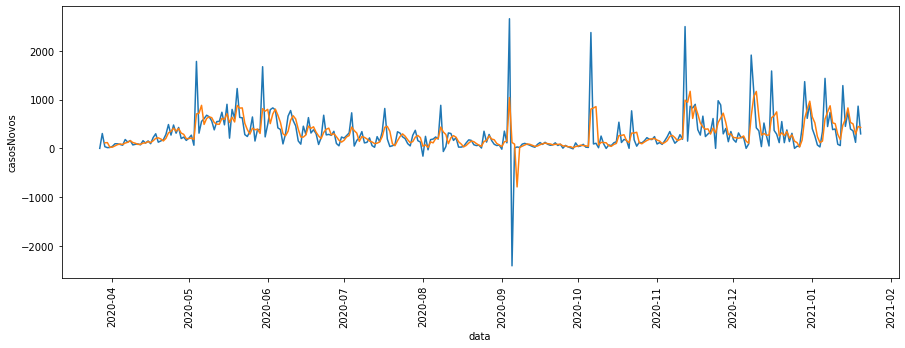

In [ ]:
### Apresentação da Média movel de 3 em 3 dados

df_fortaleza_novosCasos["Media_Movel_3"] = df_fortaleza_novosCasos["casosNovos"].rolling(3).mean()
plt.figure(figsize=(15,5))
sns.lineplot(x="data", y="casosNovos", data=df_fortaleza_novosCasos)
sns.lineplot(x="data", y="Media_Movel_3", data=df_fortaleza_novosCasos)
plt.xticks(rotation = 90)
plt.show()

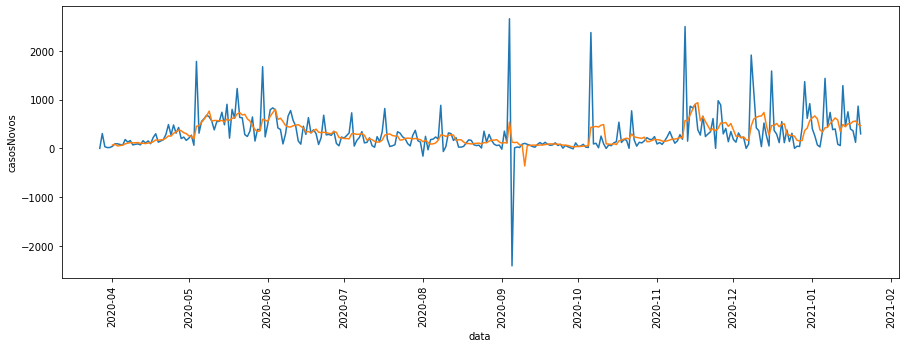

In [ ]:
### Apresentação da Média movel de 6 em 6 dados
df_fortaleza_novosCasos["Media_Movel_6"] = df_fortaleza_novosCasos["casosNovos"].rolling(6).mean()
plt.figure(figsize=(15,5))
sns.lineplot(x="data", y="casosNovos", data=df_fortaleza_novosCasos)
sns.lineplot(x="data", y="Media_Movel_6", data=df_fortaleza_novosCasos)
plt.xticks(rotation = 90)
plt.show()


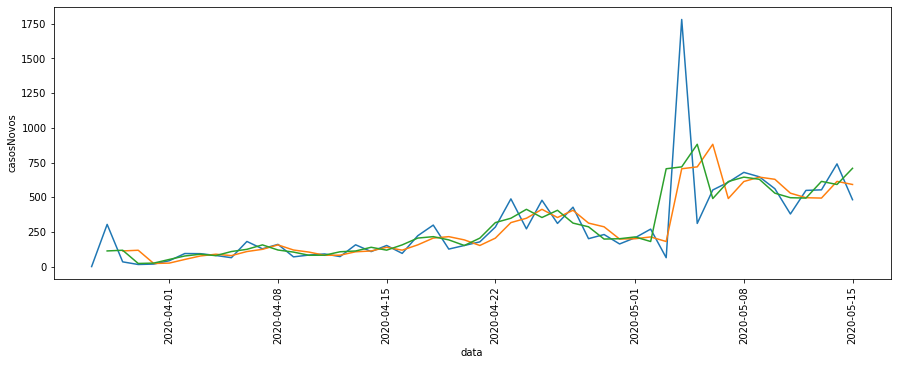

In [ ]:
### Apresentação da Média movel de 3 em 3 dados, centrado. 
df_fortaleza_novosCasos["Media_Movel_3c"] = df_fortaleza_novosCasos["casosNovos"].rolling(3, center=True).mean()
plt.figure(figsize=(15,5))
sns.lineplot(x="data", y="casosNovos", data=df_fortaleza_novosCasos[:50])
sns.lineplot(x="data", y="Media_Movel_3", data=df_fortaleza_novosCasos[:50])
sns.lineplot(x="data", y="Media_Movel_3c", data=df_fortaleza_novosCasos[:50])
plt.xticks(rotation = 90)
plt.show()

Percebe-se que alterando o número de janelas para determinação da média móvel é possível encontrar situações mais satisfatórias. No nosso caso, intervalo de 3 foi o mais coerente. Existem métodos de previsão que utilizam a média móvel, e são indicados em casos de séries temporais que não apresentam constância em seus dados. 





Referências:


https://airtonlirajr.medium.com/s%C3%A9ries-temporais-e-seus-componentes-aplicando-arima-para-forecast-em-dados-do-covid-19-c98ff361dba3

https://minerandodados.com.br/prevendo-dados-com-janelas-deslizantes-usando-python/